tl;dr : *Crowd-sourcing raw scores for your COSYNE reviewer feedback.*

Dear community, 

COSYNE is a great conference which plays a pivotal role in our field. If you have submitted an abstract (or several) you have recently received your scores. I am not affiliated to COSYNE - yet willing to contribute in some way: I would like to ask one minute of your time to report the raw scores from your reviewers. I will summarize in a few lines the results in one week time (11/02). The more numerous your feedbacks the better their precision!

Thanks!

## importing data

The data was collected using a [Google form](https://forms.gle/n5wzU2WJ5E6n5X1E7) which thanks to a public link can be directly accessed to [pandas](pandas.pydata.org/):

In [55]:
import numpy as np
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/1F2ptf6mlwvV5jaAv6iQusFbDElTIjrXi-HhURmz8E_0/export?format=csv'
score_sheet = pd.read_csv(url)
score_sheet.tail()

,Horodateur,Reviewer #1 score,Reviewer #1 confidence,Reviewer #2 score,Reviewer #2 confidence,Reviewer #3 score,Reviewer #3 confidence,Abstract accepted?,Comments?
74,07/02/2022 16:21:37,7.0,5.0,5.0,4.0,8.0,4.0,Yes,NaN
75,07/02/2022 18:37:04,6.0,4.0,4.0,5.0,6.0,5.0,No,NaN
76,08/02/2022 09:23:33,5.0,4.0,1.0,5.0,9.0,4.0,No,NaN
77,08/02/2022 13:26:53,9.0,4.0,5.0,4.0,6.0,4.0,Yes,NaN
78,08/02/2022 16:20:22,2.0,4.0,8.0,5.0,5.0,4.0,No,NaN


In [56]:
score_sheet.columns


Index(['Horodateur', 'Reviewer #1 score', 'Reviewer #1 confidence',
       'Reviewer #2 score', 'Reviewer #2 confidence', 'Reviewer #3 score',
       'Reviewer #3 confidence', 'Abstract accepted?', 'Comments?'],
      dtype='object')

Thanks for the people leaving comments:

In [57]:
score_sheet[score_sheet['Comments?'].notna()]['Comments?']

2                                                    HL
3                                                    JN
19    Reviewer 1 was in a rush it seems to read the ...
29    Reviewer 2 had only a problem with the relevan...
42                            Thank you for this study!
45           huge spread in scores with high confidence
53    reviewers not familiar with the type of resear...
62                            Thank you for doing this!
Name: Comments?, dtype: object

In [58]:
score_sheet = score_sheet.drop(['Comments?'], axis=1)
score_sheet.tail()

,Horodateur,Reviewer #1 score,Reviewer #1 confidence,Reviewer #2 score,Reviewer #2 confidence,Reviewer #3 score,Reviewer #3 confidence,Abstract accepted?
74,07/02/2022 16:21:37,7.0,5.0,5.0,4.0,8.0,4.0,Yes
75,07/02/2022 18:37:04,6.0,4.0,4.0,5.0,6.0,5.0,No
76,08/02/2022 09:23:33,5.0,4.0,1.0,5.0,9.0,4.0,No
77,08/02/2022 13:26:53,9.0,4.0,5.0,4.0,6.0,4.0,Yes
78,08/02/2022 16:20:22,2.0,4.0,8.0,5.0,5.0,4.0,No


A quick sanity check for missing data:

In [59]:
for i in [1, 2, 3]:
    print(score_sheet[score_sheet[f'Reviewer #{i} score'].isna()])
    print(score_sheet[score_sheet[f'Reviewer #{i} confidence'].isna()])    

             Horodateur  Reviewer #1 score  Reviewer #1 confidence  \
0   04/02/2022 08:54:01                NaN                     NaN   
9   04/02/2022 10:15:22                NaN                     4.0   
52  04/02/2022 20:16:41                NaN                     NaN   

    Reviewer #2 score  Reviewer #2 confidence  Reviewer #3 score  \
0                 NaN                     NaN                NaN   
9                 3.0                     3.0                4.0   
52                NaN                     NaN                NaN   

    Reviewer #3 confidence Abstract accepted?  
0                      NaN                NaN  
9                      4.0                 No  
52                     NaN                 No  
             Horodateur  Reviewer #1 score  Reviewer #1 confidence  \
0   04/02/2022 08:54:01                NaN                     NaN   
52  04/02/2022 20:16:41                NaN                     NaN   

    Reviewer #2 score  Reviewer #2 confiden

It seems we should remove lines `0`,  `9` and `52` to get a cleaner score-sheet and avoid overkill hacks. 

In [60]:
score_sheet = score_sheet.drop([0, 9, 52], axis=0)
score_sheet.head()

,Horodateur,Reviewer #1 score,Reviewer #1 confidence,Reviewer #2 score,Reviewer #2 confidence,Reviewer #3 score,Reviewer #3 confidence,Abstract accepted?
1,04/02/2022 09:14:56,3.0,4.0,5.0,1.0,4.0,3.0,No
2,04/02/2022 09:15:45,4.0,3.0,9.0,3.0,4.0,4.0,No
3,04/02/2022 09:24:01,5.0,4.0,2.0,5.0,2.0,4.0,No
4,04/02/2022 09:47:03,7.0,4.0,6.0,1.0,6.0,4.0,Yes
5,04/02/2022 09:49:27,8.0,4.0,8.0,3.0,4.0,3.0,Yes


## more data
The message received by `cosyne@confmaster.net` mentions some numbers:

In [61]:
reviewer_pool = 215
total_reviews = 2639 # out of 2643 - why is that number of 5 out of 2643 mentionned?
submitted_abstracts = 881

## analyzing raw scores

Now that we have all the date in hand, Let's do a quick analysis.

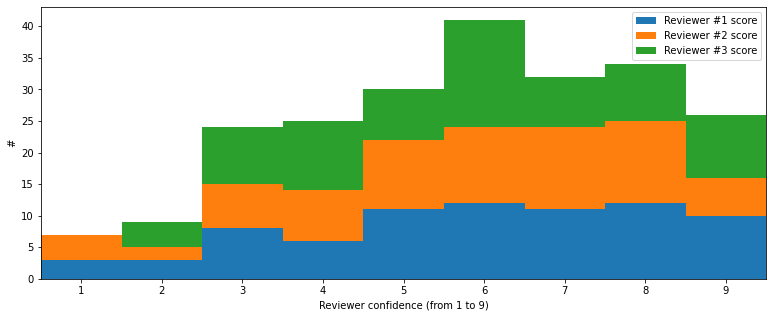

In [116]:
fig, ax = plt.subplots(figsize=(13, 5))
cols = ['Reviewer #1 score', 'Reviewer #2 score', 'Reviewer #3 score']
ax = score_sheet[cols].plot.hist(stacked=True, ax=ax, bins=9)
ax.set_xlabel('Reviewer confidence (from 1 to 9)')
ax.set_xlim(1, 10)
ax.set_xticks(np.arange(1, 10)+.5)
ax.set_xticklabels(np.arange(1, 10))
ax.set_ylabel('#');

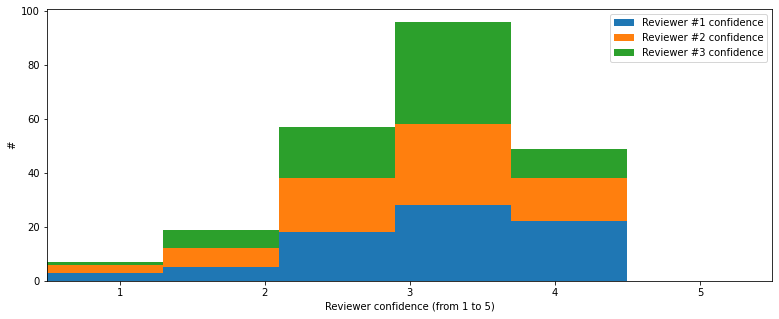

In [122]:
fig, ax = plt.subplots(figsize=(13, 5))
cols = ['Reviewer #1 confidence', 'Reviewer #2 confidence', 'Reviewer #3 confidence']
ax = score_sheet[cols].plot.hist(stacked=True, ax=ax, bins=5)
ax.set_xlabel('Reviewer confidence (from 1 to 5)')
ax.set_xlim(1, 6)
ax.set_xticks(np.arange(1, 6)+.5)
ax.set_xticklabels(np.arange(1, 6))
ax.set_ylabel('#');

In [132]:
score_sheet['Abstract accepted?']

1      No
2      No
3      No
4     Yes
5     Yes
     ... 
74    Yes
75     No
76     No
77    Yes
78     No
Name: Abstract accepted?, Length: 76, dtype: object

TypeError: '<' not supported between instances of 'str' and 'int'

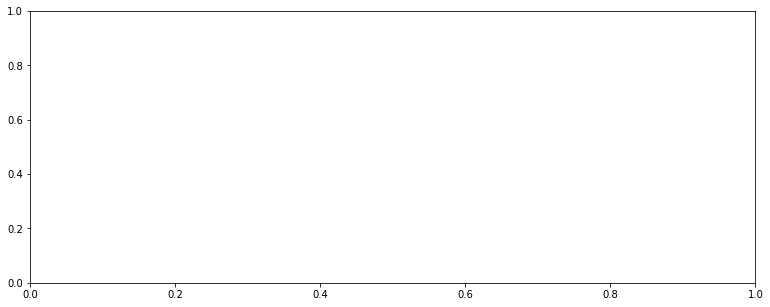

In [133]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = score_sheet.plot.pie(y='Abstract accepted?', ax=ax);


ValueError: pie requires either y column or 'subplots=True'

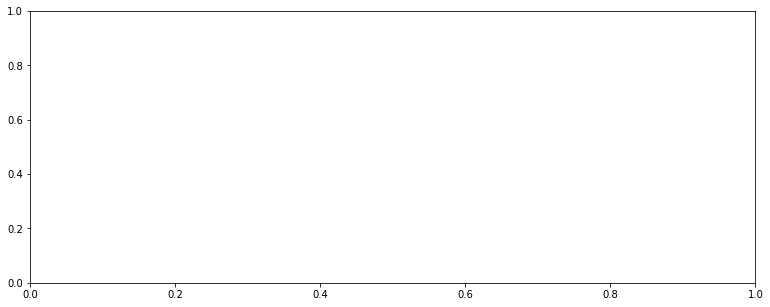

In [129]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = score_sheet[score_sheet['Abstract accepted?']=='Yes'].plot.pie(ax=ax);


TypeError: '<' not supported between instances of 'str' and 'int'

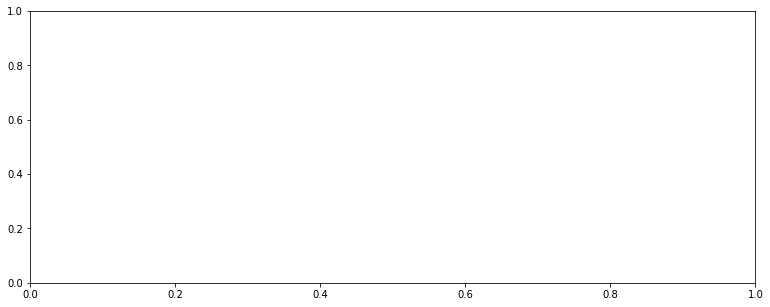

In [127]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = score_sheet.plot.pie(y='Abstract accepted?', ax=ax);


## retrieving the razor score

The message mentions the method:

    Each review comprised a short comment and a score between 1 and 10. Individual scores were weighed by a confidence factor and averaged for each submission.

    After considering additional constraining factors, the top scoring 54 % of submissions were accepted.
    

In [62]:
score_quantile = .54

This is my attempt at deriving a score:

In [63]:
p = 1 # trying out different norms... confidence=variance? confidence=std?
total_score = score_sheet['Reviewer #1 score'] * score_sheet['Reviewer #1 confidence']**p
total_score += score_sheet['Reviewer #2 score'] * score_sheet['Reviewer #2 confidence']**p
total_score += score_sheet['Reviewer #3 score'] * score_sheet['Reviewer #3 confidence']**p
total_weight = score_sheet['Reviewer #1 confidence']**p
total_weight += score_sheet['Reviewer #2 confidence']**p
total_weight += score_sheet['Reviewer #3 confidence']**p
score = total_score / total_weight

In [75]:
score[2]

5.5

In [74]:
score, score_sheet['Abstract accepted?']

(1     3.625000
 2     5.500000
 3     2.923077
 4     6.444444
 5     6.800000
         ...   
 74    6.692308
 75    5.285714
 76    4.692308
 77    6.666667
 78    5.230769
 Length: 76, dtype: float64,
 5.5,
 1      No
 2      No
 3      No
 4     Yes
 5     Yes
      ... 
 74    Yes
 75     No
 76     No
 77    Yes
 78     No
 Name: Abstract accepted?, Length: 76, dtype: object)

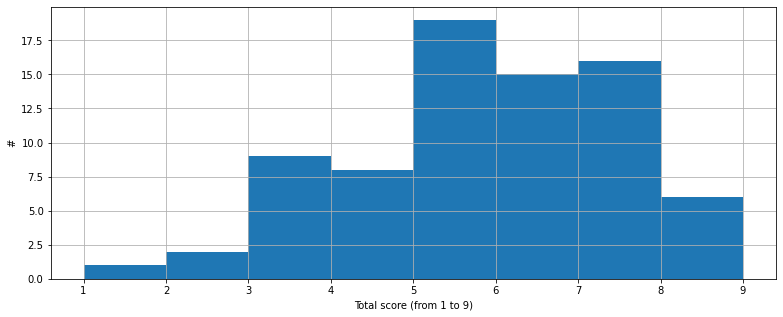

In [85]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = score.hist(bins=np.arange(1, 10), ax=ax)
ax.set_xlabel('Total score (from 1 to 9)')
ax.set_ylabel('#');

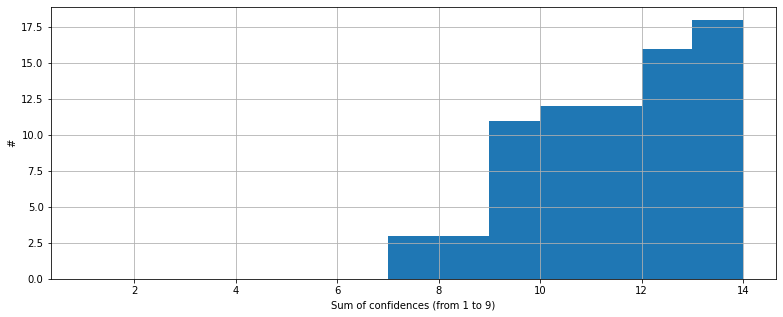

In [84]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = total_weight.hist(bins=np.arange(1, 15), ax=ax)
ax.set_xlabel('Sum of confidences (from 1 to 9)')
ax.set_ylabel('#');

In [65]:
score.shape, score_sheet['Abstract accepted?'].shape

((76,), (76,))

In [66]:
score_sheet['Abstract accepted?'][34]

'No'

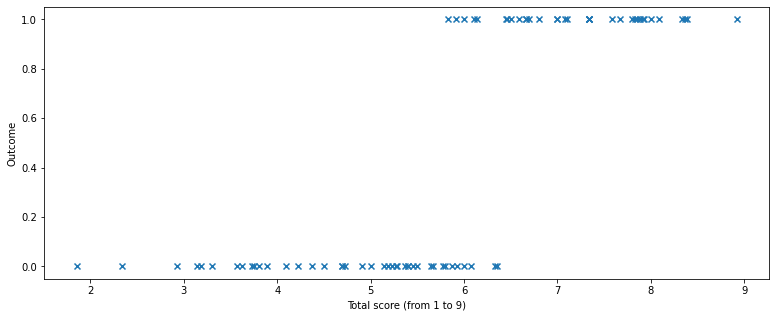

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13, 5))
ax.scatter(score, score_sheet['Abstract accepted?']=='Yes', marker='x')
ax.set_xlabel('Total score (from 1 to 9)')
ax.set_ylabel('Outcome');

An (overkill) method would be to fit a [sigmoid](https://laurentperrinet.github.io/sciblog/posts/2020-04-08-fitting-a-psychometric-curve-using-pytorch.html)... Let's rather look 

In [69]:
threshold = score.quantile(score_quantile)
print(f"threshold score for an accepted abstract {threshold:.3f}")

threshold score for an accepted abstract 6.038


In [70]:
false_negatives = score[(score > threshold) & (score_sheet['Abstract accepted?']=='No')]
print(f"Abstracts rejected above the threshold = {len(false_negatives)}")

Abstracts rejected above the threshold = 3


In [73]:
false_positives = score[(score < threshold) & (score_sheet['Abstract accepted?']=='Yes')]
print(f"Abstracts accepted below the threshold = {len(false_negatives)}")

Abstracts accepted below the threshold = 3


This result may be (certainly) due to an error in reporting the score

## gray zone

It seems there is a "gray zone" for abstracts that were between the minimal score for accepted abstracts and the maximal score for rejected ones:

In [10]:
score_min = score[score_sheet['Abstract accepted?']=='Yes'].min()
print(f"Minimal score for an accepted abstract {score_min:.3f}")

Minimal score for an accepted abstract 5.833


In [11]:
score_max = score[score_sheet['Abstract accepted?']=='No'].max()
print(f"Maximal score for a rejected abstract {score_max:.3f}")

Maximal score for a rejected abstract 6.357


In [12]:
gray_zone = score[(score_min < score) & ( score < score_max)]
print(f"Abstracts in gray zone {len(gray_zone)}")

Abstracts in gray zone 9


In [15]:
print(f"Percent abstracts in gray zone = {len(gray_zone)/len(score)*100:.1f}%")

Percent abstracts in gray zone = 11.4%


In [16]:
print(f"Predicted total abstracts in gray zone = {int(len(gray_zone)/len(score)*submitted_abstracts)}")

Predicted total abstracts in gray zone = 100


Out of the total of $881$ abstract, it is certainly worth to put more attention at these $100$ abstracts which are closer to the threshold. 

## reliability 

